In [61]:
import pandas as pd

In [83]:
data = pd.read_csv('/content/dataset.csv')

df = pd.DataFrame(data)
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [96]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [84]:
df[df['artists'].isna()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [85]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [86]:
df.fillna({'artists':'Unknown',
           'album_name':'Unknown',
           'track_name':'Unknown'},
          inplace=True)

In [87]:
df[df['artists'] == 'Unknown']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,Unknown,Unknown,Unknown,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [88]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           114000 non-null  object 
 2   album_name        114000 non-null  object 
 3   track_name        114000 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [112]:
#top 10 músicas
df_top10 = df.sort_values(by='popularity', ascending=False).drop_duplicates(subset='track_id', keep='first')[['track_name','artists', 'album_name', 'track_genre', 'duration_ms', 'popularity']].head(10)
df_top10['duration_ms'] = round((df_top10['duration_ms']/1000)/60, 2)
df_top10['duration_ms']=df_top10['duration_ms'].astype(str).apply(lambda x: '{}:{}'.format(x[0], x[2:]) if len(x[2:])> 1 else '{}:{}0'.format(x[0], x[2:]))

df_top10.rename(columns={'track_name' : 'Nome',
                         'artists' : 'Artistas',
                         'album_name' : 'Álbum',
                         'track_genre' : 'Gênero',
                         'popularity' : 'Popularidade',
                         'duration_minutes' : 'Duração'},
                inplace=True)

df_top10['Gênero'] = df_top10['Gênero'].apply(lambda x : x.capitalize())
df_top10.index = range(1, len(df_top10)+1)
df_top10

,Nome,Artistas,Álbum,Gênero,duration_ms,Popularidade
1,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Dance,2:62,100
2,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",Hip-hop,3:32,99
3,I'm Good (Blue),David Guetta;Bebe Rexha,I'm Good (Blue),Pop,2:92,98
4,La Bachata,Manuel Turizo,La Bachata,Reggaeton,2:71,98
5,Me Porto Bonito,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Latino,2:98,97
6,Tití Me Preguntó,Bad Bunny,Un Verano Sin Ti,Latino,4:06,97
7,Efecto,Bad Bunny,Un Verano Sin Ti,Latino,3:55,96
8,I Ain't Worried,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,Pop,2:47,96
9,Under The Influence,Chris Brown,Indigo (Extended),Pop,3:08,96
10,Ojitos Lindos,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti,Latin,4:30,95


In [91]:
#top 100 músicas
df_top100 = df.sort_values(by='popularity', ascending=False).drop_duplicates(subset='track_id', keep='first')[['track_name','artists', 'album_name', 'track_genre', 'duration_ms', 'popularity']].head(100)
df_top100['duration_ms'] = round((df_top100['duration_ms']/1000)/60, 2)
df_top100['duration_ms']=df_top100['duration_ms'].astype(str).apply(lambda x: '{}:{}'.format(x[0], x[2:]) if len(x[2:])> 1 else '{}:{}0'.format(x[0], x[2:]))

df_top100.rename(columns={'track_name' : 'Nome',
                         'artists' : 'Artistas',
                         'album_name' : 'Álbum',
                         'track_genre' : 'Gênero',
                         'popularity' : 'Popularidade',
                         'duration_minutes' : 'Duração'},
                inplace=True)

df_top100['Gênero'] = df_top100['Gênero'].apply(lambda x : x.capitalize())
df_top100.index = range(1, len(df_top100)+1)
df_top100

,Nome,Artistas,Álbum,Gênero,duration_ms,Popularidade
1,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Dance,2:62,100
2,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",Hip-hop,3:32,99
3,I'm Good (Blue),David Guetta;Bebe Rexha,I'm Good (Blue),Pop,2:92,98
4,La Bachata,Manuel Turizo,La Bachata,Reggaeton,2:71,98
5,Me Porto Bonito,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Latino,2:98,97
...,...,...,...,...,...,...
96,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Pop,3:04,87
97,Dos Mil 16,Bad Bunny,Un Verano Sin Ti,Latino,3:48,87
98,Betty (Get Money),Yung Gravy,Betty (Get Money),Hip-hop,2:44,87
99,The Real Slim Shady,Eminem,The Marshall Mathers LP,Hip-hop,4:74,87


In [92]:
#loudness of top 10
df_loudness = df.sort_values(by='popularity', ascending=False).drop_duplicates(subset='track_id', keep='first')[['track_name', 'loudness']].head(10)
df_loudness['loudness'] = df_loudness['loudness'].apply(lambda x : round(abs(x), 2))
df_loudness.index = range(1, len(df_loudness)+1)
df_loudness

,track_name,loudness
1,Unholy (feat. Kim Petras),7.38
2,"Quevedo: Bzrp Music Sessions, Vol. 52",5.55
3,I'm Good (Blue),3.67
4,La Bachata,5.33
5,Me Porto Bonito,5.11
6,Tití Me Preguntó,5.20
7,Efecto,8.80
8,I Ain't Worried,5.93
9,Under The Influence,5.53
10,Ojitos Lindos,5.75


[Text(0.5, 0, 'Song'), Text(0, 0.5, 'Loudness (dB)')]

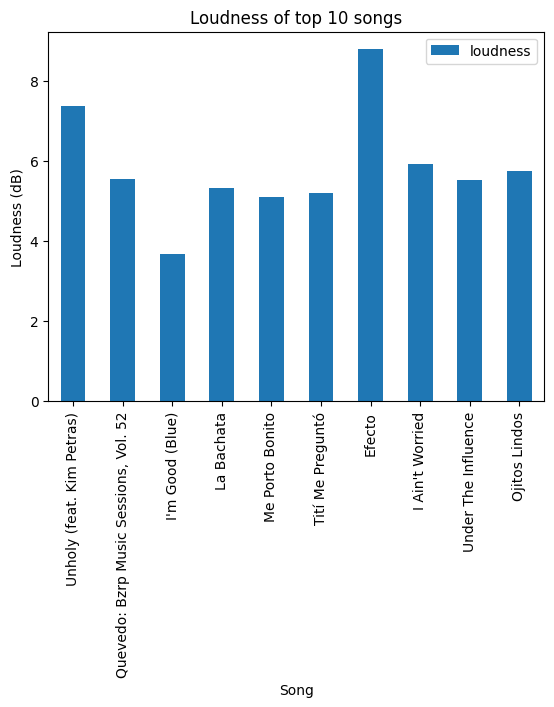

In [113]:
import matplotlib.pyplot as plt
df_loudness.plot(x='track_name', y='loudness', kind='bar', title='Loudness of top 10 songs').set(xlabel='Song', ylabel='Loudness (dB)')
#plt.xticks(rotation=45)

In [94]:
#gêneros musicais mais populares

df_top100.groupby('Gênero')['Nome'].count().sort_values(ascending=False).to_frame().reset_index()

,Gênero,Nome
0,Pop,30
1,Hip-hop,11
2,Latino,10
3,Rock,8
4,Dance,8
5,Indie,5
6,Reggae,5
7,Latin,4
8,Reggaeton,3
9,Edm,2


In [95]:
#artistas com mais músicas nesse dataframe
popular_artists = df.groupby('artists')['track_name'].count().sort_values(ascending=False).to_frame().reset_index()
popular_artists.rename(columns={'track_name' : 'Número de músicas',
                                'artists':'Artista'},
                       inplace=True)
popular_artists.index = range(1, len(popular_artists)+1)
popular_artists

,Artista,Número de músicas
1,The Beatles,279
2,George Jones,271
3,Stevie Wonder,236
4,Linkin Park,224
5,Ella Fitzgerald,222
...,...,...
31434,DubVision;Afrojack,1
31435,Dub Pistols;Too Many T's,1
31436,Mothership,1
31437,Motion City Soundtrack,1


In [98]:
def check_danceability(value):
  if value > 0.7:
    return 'High'
  elif value > 0.3:
    return 'Medium'
  else:
    return 'Low'

df['danceability_class'] = df['danceability'].apply(check_danceability)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability_class
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Medium
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Medium
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Medium
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Low
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Low
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Low
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Medium
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Medium


In [99]:
import seaborn as sns

<ipython-input-111-0dd5aea45d7b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['danceability_class'], y=df['popularity'], palette='rainbow').set(xlabel='Danceability', ylabel='Popularity')


[Text(0.5, 0, 'Danceability'), Text(0, 0.5, 'Popularity')]

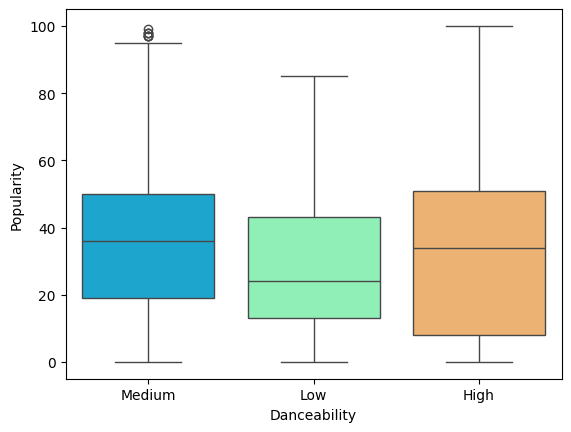

In [111]:
sns.boxplot(x=df['danceability_class'], y=df['popularity'], palette='rainbow').set(xlabel='Danceability', ylabel='Popularity')


In [114]:
df['energy_class'] = df['energy'].apply(lambda x : 'High Energy' if x > 0.5 else 'Low Energy')
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,danceability_class,energy_class
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Medium,Low Energy
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Medium,Low Energy
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Medium,Low Energy
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Low,Low Energy
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,Medium,Low Energy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Low,Low Energy
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Low,Low Energy
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Medium,Low Energy
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Medium,High Energy


<ipython-input-115-d80e75f2f168>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['energy_class'], y=df['popularity'], palette='rainbow').set(xlabel='Energy', ylabel='Popularity')


[Text(0.5, 0, 'Energy'), Text(0, 0.5, 'Popularity')]

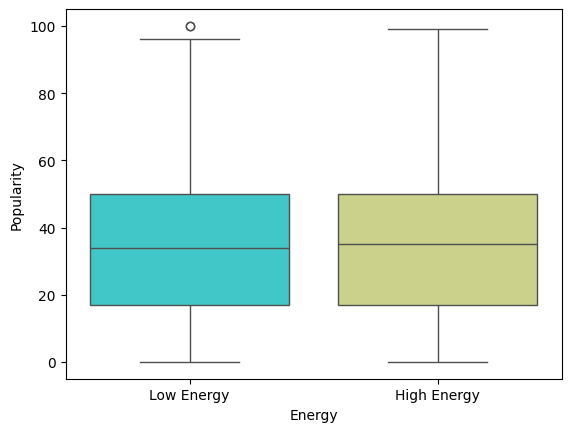

In [115]:
sns.boxplot(x=df['energy_class'], y=df['popularity'], palette='rainbow').set(xlabel='Energy', ylabel='Popularity')